#TALLER 1 - KNN
##William Gomez y Juliana Rubio


In [ ]:
if (!require('readxl')) install.packages('readxl')
if (!require('caret')) install.packages('caret')
if (!require('MLmetrics')) install.packages('MLmetrics')
if (!require('e1071')) install.packages('e1071')

In [ ]:
library(readxl)
library(caret)
library(MLmetrics)
library(ROCR)
library(e1071)

##CARGAMOS LOS DATOS

In [ ]:
cereal<-read.csv("/content/cereal2.csv", header=TRUE, sep=";", dec=",")
str(cereal)

'data.frame':	880 obs. of  5 variables:
 $ edad_cat: chr  "Menor de 31" "46-60" "Mas de 60" "31-45" ...
 $ genero  : chr  "Hombre" "Hombre" "Hombre" "Mujer" ...
 $ ecivil  : chr  "Casado" "Casado" "Casado" "Casado" ...
 $ activo  : chr  "En activo" "Sin actividad" "Sin actividad" "En activo" ...
 $ desayuno: chr  "Cereales" "Barrita de desayuno" "Avena" "Avena" ...


##PREPROCESAMIENTO

### Modifica la variable 'desayuno' para saber " Si consume Avena" vs " No consume Avena"

In [ ]:
cereal$desayuno <- ifelse(cereal$desayuno == "Avena", "Avena", "Otros")

In [ ]:
head(cereal)

,edad_cat,genero,ecivil,activo,desayuno
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Menor de 31,Hombre,Casado,En activo,Otros
2,46-60,Hombre,Casado,Sin actividad,Otros
3,Mas de 60,Hombre,Casado,Sin actividad,Avena
4,31-45,Mujer,Casado,En activo,Avena
5,46-60,Hombre,Casado,Sin actividad,Avena
6,Mas de 60,Hombre,Casado,Sin actividad,Otros


In [ ]:
##Crea un set completo de variables dummy
cerealeswin<-dummyVars("~.",data=cereal)
cerealesfin<-as.data.frame(predict(cerealeswin,newdata=cereal))

cerealesfin$desayunoOtros <- NULL
colnames(cerealesfin) <- make.names(colnames(cerealesfin))

In [ ]:
str(cerealesfin)

'data.frame':	880 obs. of  11 variables:
 $ edad_cat31.45      : num  0 0 0 1 0 0 1 0 1 1 ...
 $ edad_cat46.60      : num  0 1 0 0 1 0 0 0 0 0 ...
 $ edad_catMas.de.60  : num  0 0 1 0 0 1 0 1 0 0 ...
 $ edad_catMenor.de.31: num  1 0 0 0 0 0 0 0 0 0 ...
 $ generoHombre       : num  1 1 1 0 1 1 0 0 0 0 ...
 $ generoMujer        : num  0 0 0 1 0 0 1 1 1 1 ...
 $ ecivilCasado       : num  1 1 1 1 1 1 1 0 1 1 ...
 $ ecivilSoltero      : num  0 0 0 0 0 0 0 1 0 0 ...
 $ activoEn.activo    : num  1 0 0 1 0 0 0 0 1 0 ...
 $ activoSin.actividad: num  0 1 1 0 1 1 1 1 0 1 ...
 $ desayunoAvena      : num  0 0 1 1 1 0 0 1 1 0 ...


# DATASET DE PRUEBA Y ENTRENAMIENTO

In [ ]:
set.seed(1)
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 75% de los casos
sample <- sample.int(nrow(cerealesfin), floor(.75*nrow(cerealesfin)))
cereal.train <- cerealesfin[sample, ]
cereal.test <- cerealesfin[-sample, ]


cereal.train1 <- cereal.train
cereal.test1 <- cereal.test

In [ ]:
str(cereal.train)

'data.frame':	660 obs. of  11 variables:
 $ edad_cat31.45      : num  0 1 0 0 0 0 0 1 0 0 ...
 $ edad_cat46.60      : num  0 0 1 1 0 1 0 0 1 1 ...
 $ edad_catMas.de.60  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ edad_catMenor.de.31: num  1 0 0 0 1 0 0 0 0 0 ...
 $ generoHombre       : num  0 0 0 0 0 0 0 1 0 0 ...
 $ generoMujer        : num  1 1 1 1 1 1 1 0 1 1 ...
 $ ecivilCasado       : num  0 0 1 1 0 0 0 1 1 1 ...
 $ ecivilSoltero      : num  1 1 0 0 1 1 1 0 0 0 ...
 $ activoEn.activo    : num  1 0 0 0 1 0 1 0 0 0 ...
 $ activoSin.actividad: num  0 1 1 1 0 1 0 1 1 1 ...
 $ desayunoAvena      : num  0 0 1 0 0 1 0 0 0 0 ...


In [ ]:
# Volvemos la columna que queremos predecir de tipo 'Factor'
# Lo hacemos para el conjunto de entrenamiento y de prueba
cereal.train$desayunoAvena<-as.factor(cereal.train$desayunoAvena)
cereal.train1$desayunoAvena<-as.factor(cereal.train1$desayunoAvena)
cereal.test$desayunoAvena<-as.factor(cereal.test$desayunoAvena)
cereal.test1$desayunoAvena<-as.factor(cereal.test1$desayunoAvena)

## Dataset preprocesado:

In [ ]:
str(cereal.train)

'data.frame':	660 obs. of  11 variables:
 $ edad_cat31.45      : num  0 1 0 0 0 0 0 1 0 0 ...
 $ edad_cat46.60      : num  0 0 1 1 0 1 0 0 1 1 ...
 $ edad_catMas.de.60  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ edad_catMenor.de.31: num  1 0 0 0 1 0 0 0 0 0 ...
 $ generoHombre       : num  0 0 0 0 0 0 0 1 0 0 ...
 $ generoMujer        : num  1 1 1 1 1 1 1 0 1 1 ...
 $ ecivilCasado       : num  0 0 1 1 0 0 0 1 1 1 ...
 $ ecivilSoltero      : num  1 1 0 0 1 1 1 0 0 0 ...
 $ activoEn.activo    : num  1 0 0 0 1 0 1 0 0 0 ...
 $ activoSin.actividad: num  0 1 1 1 0 1 0 1 1 1 ...
 $ desayunoAvena      : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 1 1 ...


In [ ]:
head(cereal.train)

,edad_cat31.45,edad_cat46.60,edad_catMas.de.60,edad_catMenor.de.31,generoHombre,generoMujer,ecivilCasado,ecivilSoltero,activoEn.activo,activoSin.actividad,desayunoAvena
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
836,0,0,0,1,0,1,0,1,1,0,0
679,1,0,0,0,0,1,0,1,0,1,0
129,0,1,0,0,0,1,1,0,0,1,1
509,0,1,0,0,0,1,1,0,0,1,0
471,0,0,0,1,0,1,0,1,1,0,0
299,0,1,0,0,0,1,0,1,0,1,1


##VALIDACION CRUZADA

A continuación, se realiza validación cruzada

In [ ]:
# creo parámetros de validación cruzada
set.seed(1)
cross<-trainControl(method="cv",number=10)
modeloknn1<-train(desayunoAvena~.,method="knn",
                  tuneGrid=expand.grid(k=1:30),
                  trControl=cross,
                  metric="Accuracy",
                  data=cereal.train)

k-Nearest Neighbors 

660 samples
 10 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 595, 594, 594, 593, 594, 594, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7546954  0.4618197
   2  0.7592409  0.4699579
   3  0.7577257  0.4681969
   4  0.7516651  0.4537234
   5  0.7531803  0.4543657
   6  0.7577257  0.4651685
   7  0.7577257  0.4646142
   8  0.7577257  0.4632931
   9  0.7577257  0.4648585
  10  0.7562106  0.4623777
  11  0.7546954  0.4591306
  12  0.7562106  0.4625911
  13  0.7577257  0.4677402
  14  0.7607560  0.4723344
  15  0.7425742  0.4202570
  16  0.7411043  0.4142254
  17  0.7304982  0.3802354
  18  0.7335285  0.3834849
  19  0.7183756  0.3406263
  20  0.7168605  0.3321681
  21  0.7138754  0.3175783
  22  0.7153905  0.3194272
  23  0.7138754  0.3152899
  24  0.7153905  0.3210267
  25  0.7138754  0.3145245
  26  0.7199360  0.3327581
  27  0.7244814  0.3439945
  28  0.7

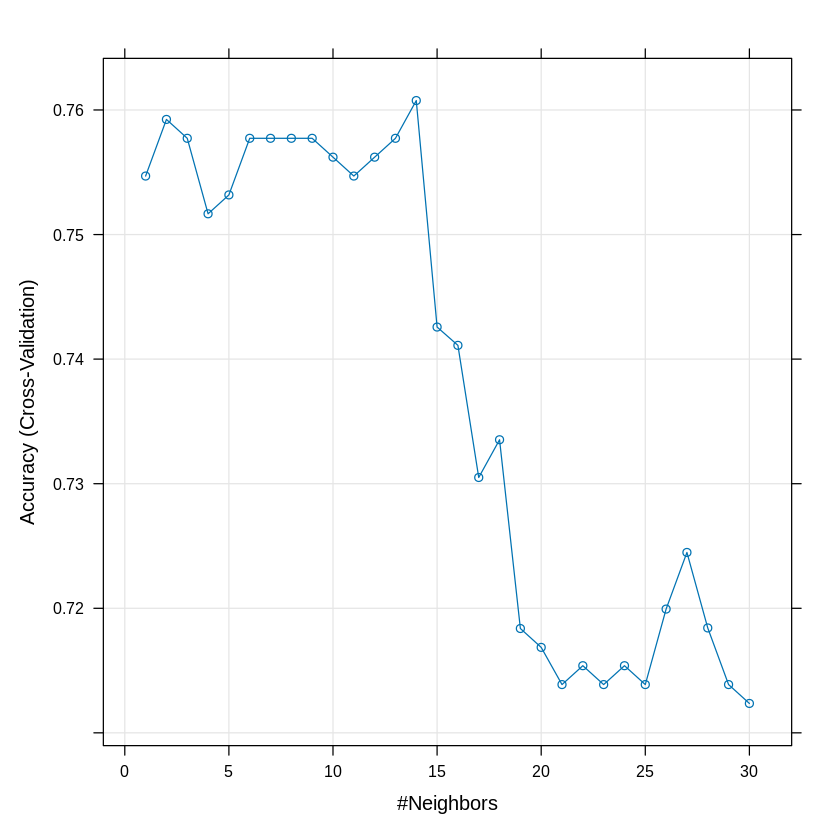

In [ ]:
modeloknn1
plot(modeloknn1)

In [ ]:
set.seed(1)

levels(cereal.train$desayunoAvena) <- make.names(levels(factor(cereal.train$desayunoAvena)))
# creo parámetros de validación cruzada
cross<-trainControl(method="cv",number=5,
                    classProbs = TRUE,
                    summaryFunction =prSummary)

modeloknn2<-train(desayunoAvena~.,method="knn",
                  tuneGrid=expand.grid(k=1:30),
                  trControl=cross,
                  metric="AUC",
                  data=cereal.train)

k-Nearest Neighbors 

660 samples
 10 predictor
  2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 527, 529, 528, 528, 528 
Resampling results across tuning parameters:

  k   AUC        Precision  Recall     F        
   1  0.5775635  0.8160580  0.7924487  0.8027405
   2  0.5775635  0.8096098  0.7877975  0.7971674
   3  0.5775635  0.8158027  0.7901231  0.8013968
   4  0.5872484  0.8141493  0.7924487  0.8016216
   5  0.5902001  0.8130537  0.7970999  0.8034522
   6  0.5981058  0.8095207  0.7970999  0.8016774
   7  0.5986669  0.8081846  0.7994254  0.8021422
   8  0.6123983  0.8106011  0.7970999  0.8024224
   9  0.6247622  0.8074734  0.7994254  0.8020058
  10  0.6446456  0.8083022  0.7947743  0.8001102
  11  0.6665106  0.8130563  0.7994254  0.8047803
  12  0.6969988  0.8101199  0.7947743  0.8010243
  13  0.7322624  0.7909515  0.7994254  0.7943119
  14  0.7454871  0.7867547  0.8064022  0.7954908
  15  0.7969685  0.7854608  0.8157592  

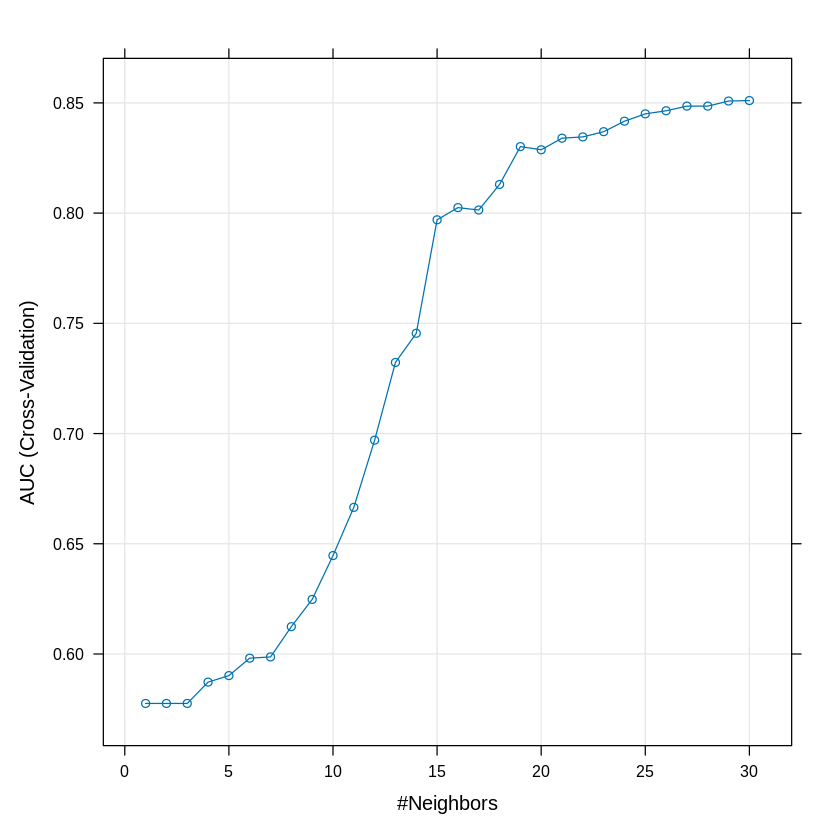

In [ ]:
modeloknn2
plot(modeloknn2)

#MODELADO -- CREAMOS MODELOS DE KNN
###Vamos a probar el modelo con k=5, k=14 y k=30


#K=5


In [ ]:
# MODELO CON K = 5
set.seed(1)
test_pred = knn3(desayunoAvena~., data=cereal.train1, k = 5)

In [ ]:
# Desempeño en entrenamiento.  K = 5
predmod <- predict(test_pred, cereal.train1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          cereal.train1$desayunoAvena, positive = "1")
confknn$table
confknn$overall
confknn$byClass

          Reference
Prediction   0   1
         0 346  67
         1  83 164

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.727273e-01   5.083579e-01   7.388164e-01   8.041773e-01   6.500000e-01 
AccuracyPValue  McnemarPValue 
  5.323138e-12   2.206714e-01

Sensitivity          Specificity       Pos Pred Value 
           0.7099567            0.8065268            0.6639676 
      Neg Pred Value            Precision               Recall 
           0.8377724            0.6639676            0.7099567 
                  F1           Prevalence       Detection Rate 
           0.6861925            0.3500000            0.2484848 
Detection Prevalence    Balanced Accuracy 
           0.3742424            0.7582418

In [ ]:
# Desempeño en prueba.  K = 5
predmod <- predict(test_pred, cereal.test1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          cereal.test1$desayunoAvena, positive = "1")
confknn$table
confknn$overall
confknn$byClass

          Reference
Prediction   0   1
         0 111  20
         1  30  59

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.727273e-01   5.196087e-01   7.115897e-01   8.263579e-01   6.409091e-01 
AccuracyPValue  McnemarPValue 
  1.734355e-05   2.030918e-01

Sensitivity          Specificity       Pos Pred Value 
           0.7468354            0.7872340            0.6629213 
      Neg Pred Value            Precision               Recall 
           0.8473282            0.6629213            0.7468354 
                  F1           Prevalence       Detection Rate 
           0.7023810            0.3590909            0.2681818 
Detection Prevalence    Balanced Accuracy 
           0.4045455            0.7670347

[1] 0.7670347

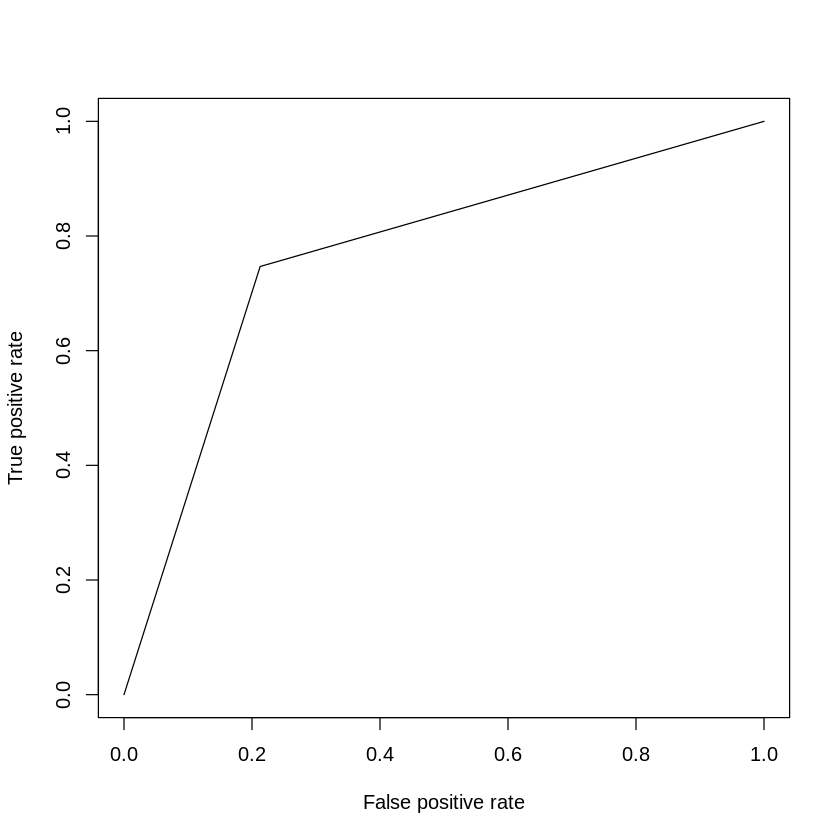

In [ ]:
# CURVA ROC y AUC.  K = 5

#crear objeto de predicciones
pr<-prediction(pronknn,cereal.test$desayunoAvena)
#creacion del objeto de la curva
curvaROC<-performance(pr,measure="tpr",x.measure="fpr")
#grafico de la curva
plot(curvaROC)

#calcular el AUC
auc<-performance(pr,measure = "auc")
auc <- auc@y.values[[1]]
#ver el AUC
auc

#K=14


In [ ]:
# MODELO CON K = 14
set.seed(1)
test_pred = knn3(desayunoAvena~., data=cereal.train1, k = 14)

In [ ]:
# Desempeño en entrenamiento.  K = 14
predmod <- predict(test_pred, cereal.train1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          cereal.train1$desayunoAvena, positive = "1")
confknn$table
confknn$overall
confknn$byClass

          Reference
Prediction   0   1
         0 349  72
         1  80 159

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.696970e-01   4.978527e-01   7.356513e-01   8.013095e-01   6.500000e-01 
AccuracyPValue  McnemarPValue 
  1.781202e-11   5.701878e-01

Sensitivity          Specificity       Pos Pred Value 
           0.6883117            0.8135198            0.6652720 
      Neg Pred Value            Precision               Recall 
           0.8289786            0.6652720            0.6883117 
                  F1           Prevalence       Detection Rate 
           0.6765957            0.3500000            0.2409091 
Detection Prevalence    Balanced Accuracy 
           0.3621212            0.7509158

In [ ]:
# Desempeño en prueba.  K = 14
predmod <- predict(test_pred, cereal.test1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          cereal.test1$desayunoAvena, positive = "1")
confknn$table
confknn$overall
confknn$byClass

          Reference
Prediction   0   1
         0 112  21
         1  29  58

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.727273e-01   5.169931e-01   7.115897e-01   8.263579e-01   6.409091e-01 
AccuracyPValue  McnemarPValue 
  1.734355e-05   3.221988e-01

Sensitivity          Specificity       Pos Pred Value 
           0.7341772            0.7943262            0.6666667 
      Neg Pred Value            Precision               Recall 
           0.8421053            0.6666667            0.7341772 
                  F1           Prevalence       Detection Rate 
           0.6987952            0.3590909            0.2636364 
Detection Prevalence    Balanced Accuracy 
           0.3954545            0.7642517

[1] 0.7642517

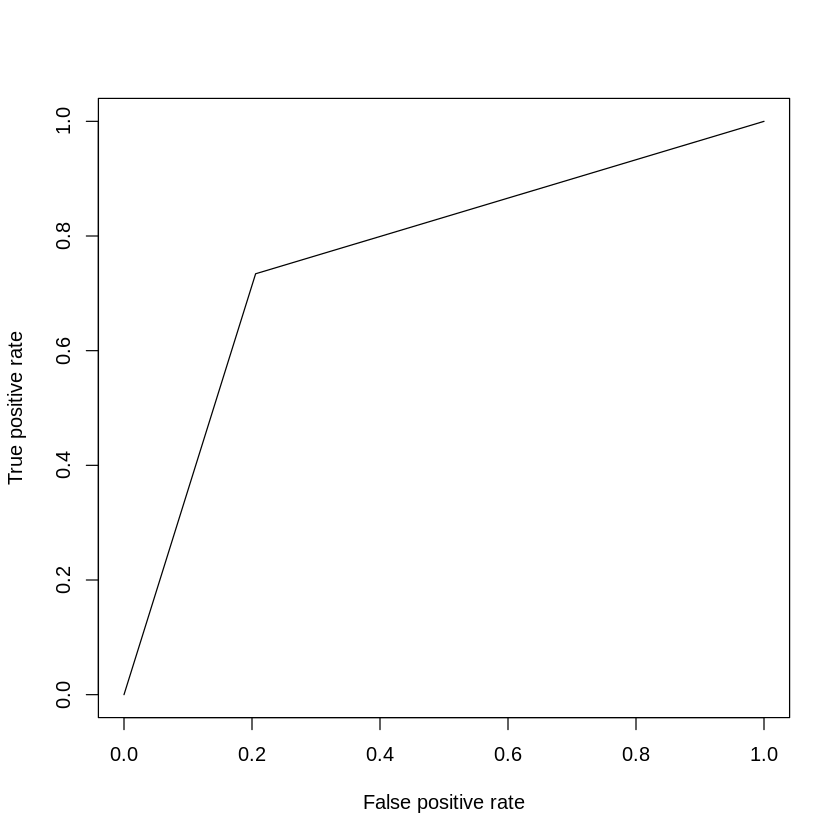

In [ ]:
# CURVA ROC y AUC.  K = 14

#crear objeto de predicciones
pr<-prediction(pronknn,cereal.test$desayunoAvena)
#creacion del objeto de la curva
curvaROC<-performance(pr,measure="tpr",x.measure="fpr")
#grafico de la curva
plot(curvaROC)

#calcular el AUC
auc<-performance(pr,measure = "auc")
auc <- auc@y.values[[1]]
#ver el AUC
auc

#K=30


In [ ]:
# MODELO CON K = 30
set.seed(1)
test_pred = knn3(desayunoAvena~., data=cereal.train1, k = 30)

In [ ]:
# Desempeño en entrenamiento.  K = 30
predmod <- predict(test_pred, cereal.train1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          cereal.train1$desayunoAvena, positive = "1")
confknn$table
confknn$overall
confknn$byClass

          Reference
Prediction   0   1
         0 373 124
         1  56 107

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.272727e-01   3.569132e-01   6.915712e-01   7.609272e-01   6.500000e-01 
AccuracyPValue  McnemarPValue 
  1.341161e-05   5.917660e-07

Sensitivity          Specificity       Pos Pred Value 
           0.4632035            0.8694639            0.6564417 
      Neg Pred Value            Precision               Recall 
           0.7505030            0.6564417            0.4632035 
                  F1           Prevalence       Detection Rate 
           0.5431472            0.3500000            0.1621212 
Detection Prevalence    Balanced Accuracy 
           0.2469697            0.6663337

In [ ]:
# Desempeño en prueba.  K = 30
predmod <- predict(test_pred, cereal.test1, type = "prob")
pronknn<-ifelse(predmod[,2] > 0.5 ,1, 0)
confknn<-confusionMatrix(as.factor(pronknn),
                          cereal.test1$desayunoAvena, positive = "1")
confknn$table
confknn$overall
confknn$byClass

          Reference
Prediction   0   1
         0 122  30
         1  19  49

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  0.7772727273   0.5008334877   0.7164618904   0.8304488873   0.6409090909 
AccuracyPValue  McnemarPValue 
  0.0000088238   0.1531274510

Sensitivity          Specificity       Pos Pred Value 
           0.6202532            0.8652482            0.7205882 
      Neg Pred Value            Precision               Recall 
           0.8026316            0.7205882            0.6202532 
                  F1           Prevalence       Detection Rate 
           0.6666667            0.3590909            0.2227273 
Detection Prevalence    Balanced Accuracy 
           0.3090909            0.7427507

[1] 0.7427507

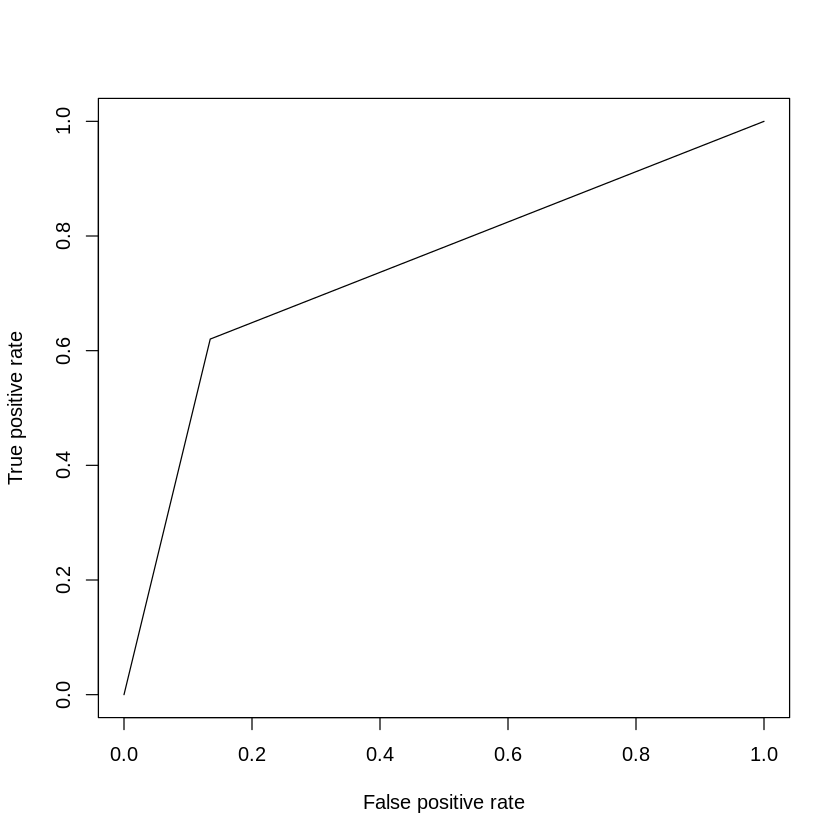

In [ ]:
# CURVA ROC y AUC.  K = 30

#crear objeto de predicciones
pr<-prediction(pronknn,cereal.test$desayunoAvena)
#creacion del objeto de la curva
curvaROC<-performance(pr,measure="tpr",x.measure="fpr")
#grafico de la curva
plot(curvaROC)

#calcular el AUC
auc<-performance(pr,measure = "auc")
auc <- auc@y.values[[1]]
#ver el AUC
auc

#CONCLUSIONES

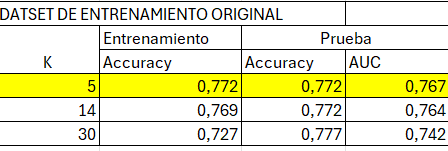

* Se hace validación cruzada con 10 pliegues para determinar, por medio de la métrica 'Accuracy', el k más óptimo, dando como mejor resultado k=14. Sin embargo, por el principio de parcimonia, nosotros identificamos k=5 como el de mejor 'Accuracy'. Por otro lado, se hace validación cruzada de 5 pliegues para analizar la métrica 'AUC', dando como mejor número de vecinos k=30.

* **Mejor Valor de K**: Según las métricas de los 3 modelos entrenados, K = 5 parece ser la mejor opción. Proporciona un equilibrio adecuado entre la precisión y la capacidad de discriminación (AUC) tanto en el conjunto de entrenamiento como en el de prueba.

* Se entrenó y sintonizó un modelo de Machine Learning llamado 'KNN', el cual es un modelo sencillo que solo tiene un hiperparámetro (k: el número de vecinos). Para ello, utilizamos validación cruzada y comparación de las métricas 'Accuracy' y 'AUC' con el fin de entrenar el mejor modelo posible. Este modelo base nos servirá para tener un nivel de referencia con el que comparar otros modelos de Machine Learning que son más 'poderosos'.

                                                                  FIN